In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import scipy.optimize
import seaborn as sns

In [2]:
data = pd.concat([
    pd.read_csv('data_1.csv'),
    pd.read_csv('data_2.csv'),
    pd.read_csv('data_3.csv')
])

In [3]:
data2000 = data[data['N'] == 2000]

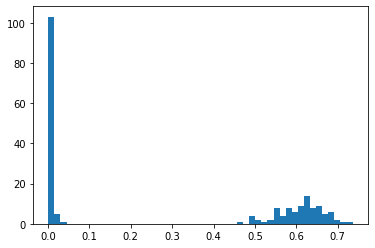

In [4]:
d = data2000[data2000['A'] == 0.0]

n, bins, patches = plt.hist(d['infected_ratio'], bins =50)

In [5]:
d['infected_ratio'].sort_values()

20     0.0005
165    0.0005
53     0.0005
24     0.0005
25     0.0005
        ...  
147    0.6900
177    0.6970
150    0.6995
8      0.7175
0      0.7365
Name: infected_ratio, Length: 200, dtype: float64

In [6]:
d['infected_ratio'].size

200

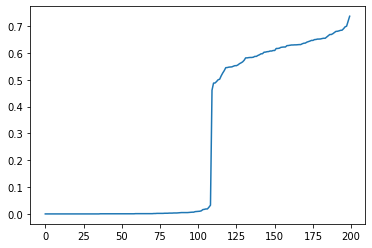

In [7]:
plt.plot(d['infected_ratio'].sort_values().values)

In [8]:
plt.get_cmap('viridis')(0.5)

(0.127568, 0.566949, 0.550556, 1.0)

Text(0, 0.5, 'P(infected ratio > X)')

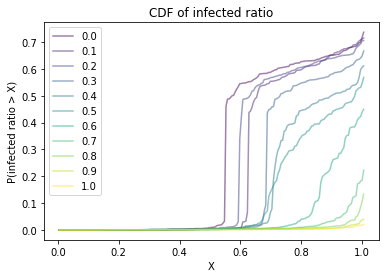

In [9]:
for A_case, d in data[data['N'] == 2000].groupby('A'):
    r = d['infected_ratio'].size
    
    plt.plot(
        np.linspace(0, 1, r) + 1 / r,
        d['infected_ratio'].sort_values().values,
        label = A_case,
        alpha = .5,
        color = plt.get_cmap('viridis')(A_case)
    )
plt.legend()
plt.title("CDF of infected ratio")
plt.xlabel('X')
plt.ylabel('P(infected ratio > X)')

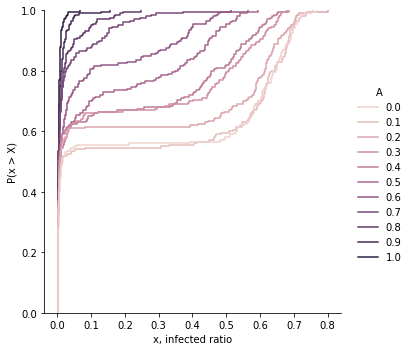

In [10]:

splot = sns.displot(
    x='infected_ratio',
    hue="A",
    data=data[data['N'] == 1000],
    kind="ecdf")

splot.set(#xscale="log",
          xlabel='x, infected ratio',
          ylabel='P(x > X)')


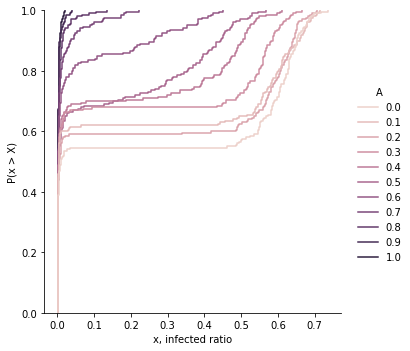

In [11]:

splot = sns.displot(
    x='infected_ratio',
    hue="A",
    data=data[data['N'] == 2000],
    kind="ecdf")

splot.set(#xscale="log",
          xlabel='x, infected ratio',
          ylabel='P(x > X)')


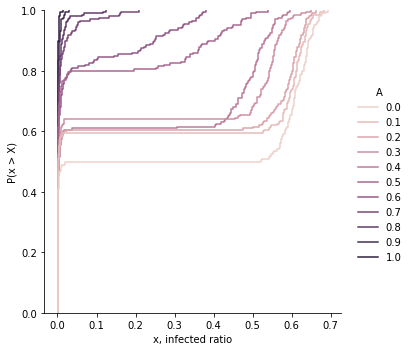

In [12]:

splot = sns.displot(
    x='infected_ratio',
    hue="A",
    data=data[data['N'] == 4000],
    kind="ecdf")

splot.set(#xscale="log",
          xlabel='x, infected ratio',
          ylabel='P(x > X)')


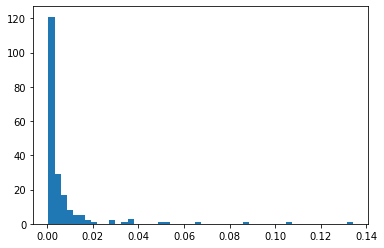

In [17]:
#r = data2000['infected_ratio'].size

#x = np.linspace(0, 1, r) + 1 / r
#y = data2000['infected_ratio'].sort_values().values

d_0_5 = data2000[data2000['A'] == 0.8]


n, bins, patches = plt.hist(d_0_5['infected_ratio'], bins =50)

y = n / data2000.shape[0]
x = bins[0:-1]

In [40]:
# from https://stackoverflow.com/questions/16082171/curve-fitting-by-a-sum-of-gaussian-with-scipy
def bi_norm(x, *args):
    m1, m2, s1, s2, k1, k2 = args
    ret = k1*scipy.stats.norm.pdf(x, loc=m1 ,scale=s1)
    ret += k2*scipy.stats.norm.pdf(x, loc=m2 ,scale=s2)
    return ret

# an alternative implementation from:
# http://www.emilygraceripka.com/blog/16
def _2gaussian(x, amp1,cen1,sigma1, amp2,cen2,sigma2):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen1)/sigma1)**2))) + \
            amp2*(1/(sigma2*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen2)/sigma2)**2)))


def expon_norm(x, *args):
    m1, s1, k1, m2, s2, k2 = args
    ret = k1*scipy.stats.expon.pdf(x, loc=m1 ,scale=s1)
    ret += k2*scipy.stats.norm.pdf(x, loc=m2 ,scale=s2)
    return ret / 2

params = [1, .3, -3, -.03, .01, 1]

fitted_params,_ = scipy.optimize.curve_fit(expon_norm, x, y, p0=params)
print(fitted_params)

plt.plot(x, y, 'o')
xx = np.linspace(np.min(x), np.max(x)+0.25, 1000)
plt.plot(xx, expon_norm(xx, *fitted_params))
plt.show()

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1400.

Trying just a 0.1 cutoff on the infection ratio.

In [26]:
data.head()

,Unnamed: 0,time,A,W,C,beta_hat,alpha,gamma,zeta,limit,N,K,p,s_final,case,infected_ratio,N-cat
0,0,221,0.0,0.5,1.0,0.4,0.25,0.1,0.1,10,1000,4,0.256,448,A-0.000,0.552,N = 1000
1,1,173,0.0,0.5,1.0,0.4,0.25,0.1,0.1,10,1000,4,0.256,468,A-0.000,0.532,N = 1000
2,2,1,0.0,0.5,1.0,0.4,0.25,0.1,0.1,10,1000,4,0.256,999,A-0.000,0.001,N = 1000
3,3,26,0.0,0.5,1.0,0.4,0.25,0.1,0.1,10,1000,4,0.256,999,A-0.000,0.001,N = 1000
4,4,258,0.0,0.5,1.0,0.4,0.25,0.1,0.1,10,1000,4,0.256,369,A-0.000,0.631,N = 1000


[Text(0, 0.5, 'average final infected ratio'), Text(0.5, 0, 'adoption rate')]

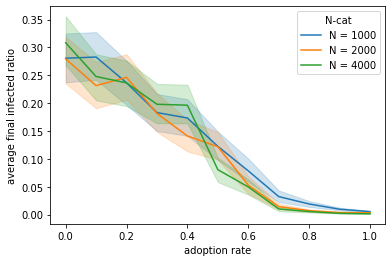

In [39]:
data["N-cat"] = data["N"].apply(lambda x: f"N = {x}")

splot = sns.lineplot(x='A', y='infected_ratio', hue="N-cat", data=data)

splot.set(#xscale="log",
          xlabel='adoption rate',
          ylabel='average final infected ratio')

In [37]:
d_epidemic = data[data['infected_ratio'] > 0.1]

/home/sb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


[Text(0, 0.5, 'average final infected ratio'), Text(0.5, 0, 'adoption rate')]

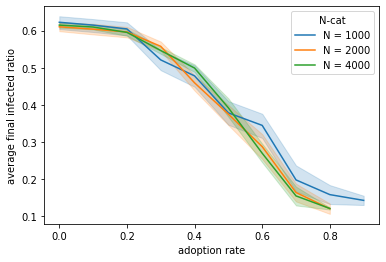

In [38]:
d_epidemic["N-cat"] = d_epidemic["N"].apply(lambda x: f"N = {x}")

splot = sns.lineplot(x='A', y='infected_ratio', hue="N-cat", data= d_epidemic)

splot.set(#xscale="log",
          xlabel='adoption rate',
          ylabel='average final infected ratio')